In [1]:
!pip install pandas-datareader

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import numpy as np
from pandas_datareader import wb
import warnings            
warnings.filterwarnings("ignore") 

In [3]:
matches = wb.search('gdp.*capita.*const')

In [4]:
worldbank = wb.download(indicator='NY.GDP.PCAP.KD', country=['US', 'CA', 'MX','BR','GB'], start=1960, end=2021)

In [5]:
worldbank.head()

NY.GDP.PCAP.KD
country year                
Brazil  2021     8537.939220
        2020     8204.202726
        2019     8592.221538
        2018     8553.876187
        2017     8470.950789

In [6]:
worldbank.shape

(310, 1)

In [7]:
worldbank.describe()

,NY.GDP.PCAP.KD
count,273.000000
mean,23047.574391
std,17140.239762
min,2578.432125
25%,7325.912358
50%,19752.604798
75%,39552.021878
max,61855.518630


In [8]:
worldbank['NY.GDP.PCAP.KD'].groupby(level=1).mean()

year
1960    10131.416229
1961    10283.157589
1962    10544.797927
1963    10876.786394
1964    11383.371608
            ...     
2017    33500.143579
2018    34041.052009
2019    34380.955016
2020    32032.428632
2021    33791.342333
Name: NY.GDP.PCAP.KD, Length: 62, dtype: float64

In [9]:
worldbank['NY.GDP.PCAP.KD'].groupby(level=0).mean()

country
Brazil             6146.803102
Canada            41054.093682
Mexico             7547.897292
United Kingdom    31428.198030
United States     39806.705876
Name: NY.GDP.PCAP.KD, dtype: float64

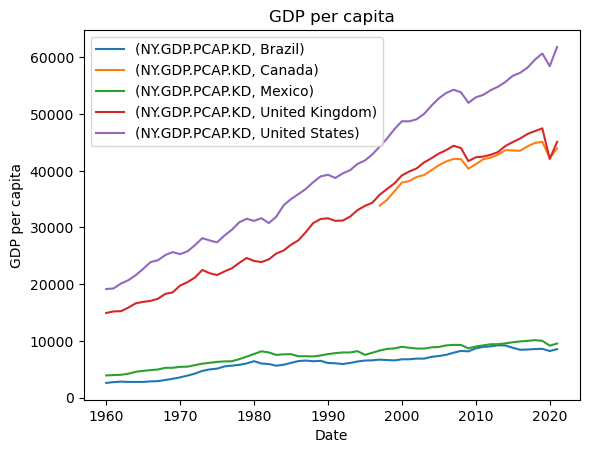

In [10]:
dfv = worldbank.unstack(level=0)
dfv.plot(); 
plt.legend(loc='best'); 
plt.title("GDP per capita"); 
plt.xlabel('Date'); plt.ylabel('GDP per capita');

In [11]:
wb.search('co2.*%').iloc[:,:2]

,id,name
6119,EN.ATM.CO2E.FF.ZS,CO2 emissions from fossil-fuels (% of total)
6122,EN.ATM.CO2E.GF.ZS,CO2 emissions from gaseous fuel consumption (%...
6128,EN.ATM.CO2E.LF.ZS,CO2 emissions from liquid fuel consumption (% ...
6133,EN.ATM.CO2E.SF.ZS,CO2 emissions from solid fuel consumption (% o...
6176,EN.CO2.BLDG.ZS,CO2 emissions from residential buildings and c...
6178,EN.CO2.ETOT.ZS,CO2 emissions from electricity and heat produc...
6180,EN.CO2.MANF.ZS,CO2 emissions from manufacturing industries an...
6182,EN.CO2.OTHX.ZS,"CO2 emissions from other sectors, excluding re..."
6184,EN.CO2.TRAN.ZS,CO2 emissions from transport (% of total fuel ...


In [12]:
indctr = ['NY.GDP.PCAP.KD']
worldgdp= wb.download(indicator=indctr,country='all', start=1960, end=2021).dropna()
worldgdp.columns= ['gdp']
worldgdp

gdp
country                     year             
Africa Eastern and Southern 2021  1460.918434
                            2020  1437.302408
                            2019  1519.879986
                            2018  1529.002119
                            2017  1531.650751
...                                       ...
Zimbabwe                    1964  1138.054110
                            1963  1187.252745
                            1962  1152.835675
                            1961  1172.379108
                            1960  1137.390586

[12525 rows x 1 columns]

In [13]:
indctr1 = ['EN.ATM.CO2E.PC']
worldCo2= wb.download(indicator=indctr1,country='all', start=1960, end=2021).dropna()
worldCo2.columns= ['CO2Emmisions']
worldCo2

CO2Emmisions
country                     year              
Africa Eastern and Southern 2019      0.903764
                            2018      0.908094
                            2017      0.928508
                            2016      0.938565
                            2015      0.956704
...                                        ...
Zimbabwe                    1994      1.469804
                            1993      1.582226
                            1992      1.735657
                            1991      1.763377
                            1990      1.635374

[7147 rows x 1 columns]

In [14]:
wrldbnk=pd.concat([worldgdp,worldCo2],axis=1)

In [15]:
wrldbnk

gdp  CO2Emmisions
country                     year                           
Africa Eastern and Southern 2021  1460.918434           NaN
                            2020  1437.302408           NaN
                            2019  1519.879986      0.903764
                            2018  1529.002119      0.908094
                            2017  1531.650751      0.928508
...                                       ...           ...
Venezuela, RB               1993          NaN      5.072241
                            1992          NaN      4.981048
                            1991          NaN      4.993025
                            1990          NaN      5.145672
Yemen, Rep.                 2019          NaN      0.351859

[12861 rows x 2 columns]

In [16]:
wrldbnk.isnull().sum()

gdp              336
CO2Emmisions    5714
dtype: int64

In [17]:
wrldbnk=wrldbnk.ffill(axis = 0)

In [18]:
wrldbnk=wrldbnk.bfill(axis = 0)

In [19]:
wrldbnk.head()

gdp  CO2Emmisions
country                     year                           
Africa Eastern and Southern 2021  1460.918434      0.903764
                            2020  1437.302408      0.903764
                            2019  1519.879986      0.903764
                            2018  1529.002119      0.908094
                            2017  1531.650751      0.928508

In [20]:
wrldbnk.shape

(12861, 2)

In [21]:
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2

In [22]:
centroids, mean_value = kmeans(wrldbnk, 3)

In [23]:
print("Code book :\n", centroids, "\n")
print("Mean of Euclidean distances :", mean_value.round(4))

Code book :
 [[2.67225377e+03 2.02217895e+00]
 [5.22268992e+04 1.09371764e+01]
 [1.89108508e+04 7.99758199e+00]] 

Mean of Euclidean distances : 3939.7513


In [24]:
clusters, distances = vq(wrldbnk, centroids)

In [25]:
print("Cluster index :", clusters, "\n")
print("Distance from the centroids :", distances)

Cluster index : [0 0 0 ... 0 0 0] 

Distance from the centroids : [1211.33585042 1234.95186664 1152.37432476 ... 1534.86605721 1534.86636026
 1534.86409092]


In [26]:
centroids, clusters = kmeans2(wrldbnk, 3, 
                              minit='random')

In [27]:
  
print("Centroids :\n", centroids, "\n")
print("Clusters :", clusters)

Centroids :
 [[3.01240554e+04 9.88804473e+00]
 [3.60774308e+03 2.41621481e+00]
 [8.22136503e+04 1.15067282e+01]] 

Clusters : [1 1 1 ... 1 1 1]


In [28]:
wrldbnk = wrldbnk.reset_index(level=1)

In [29]:
wrldbnk = wrldbnk.reset_index(level=0)

In [30]:
wrldbnk.head()

,country,year,gdp,CO2Emmisions
0,Africa Eastern and Southern,2021,1460.918434,0.903764
1,Africa Eastern and Southern,2020,1437.302408,0.903764
2,Africa Eastern and Southern,2019,1519.879986,0.903764
3,Africa Eastern and Southern,2018,1529.002119,0.908094
4,Africa Eastern and Southern,2017,1531.650751,0.928508


In [31]:
wrldbnk.isnull().sum()

country         0
year            0
gdp             0
CO2Emmisions    0
dtype: int64

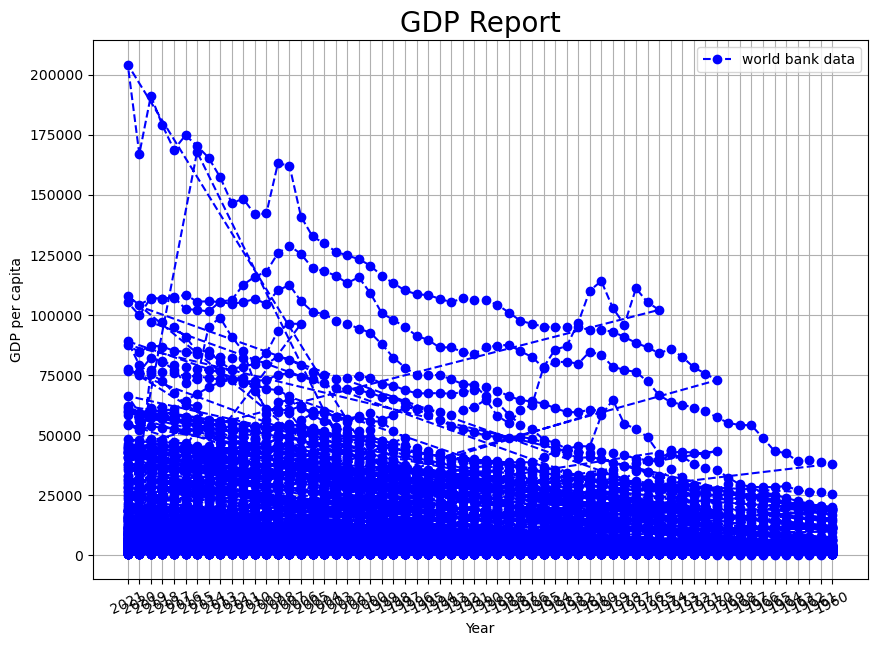

In [32]:
plt.figure(figsize =(10, 7))
plt.plot(wrldbnk['year'], wrldbnk['gdp'], color = 'b', linestyle = 'dashed',
         marker = 'o',label = "world bank data")
plt.xticks(rotation = 25)
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.title('GDP Report', fontsize = 20)
plt.grid()
plt.legend()
plt.show()

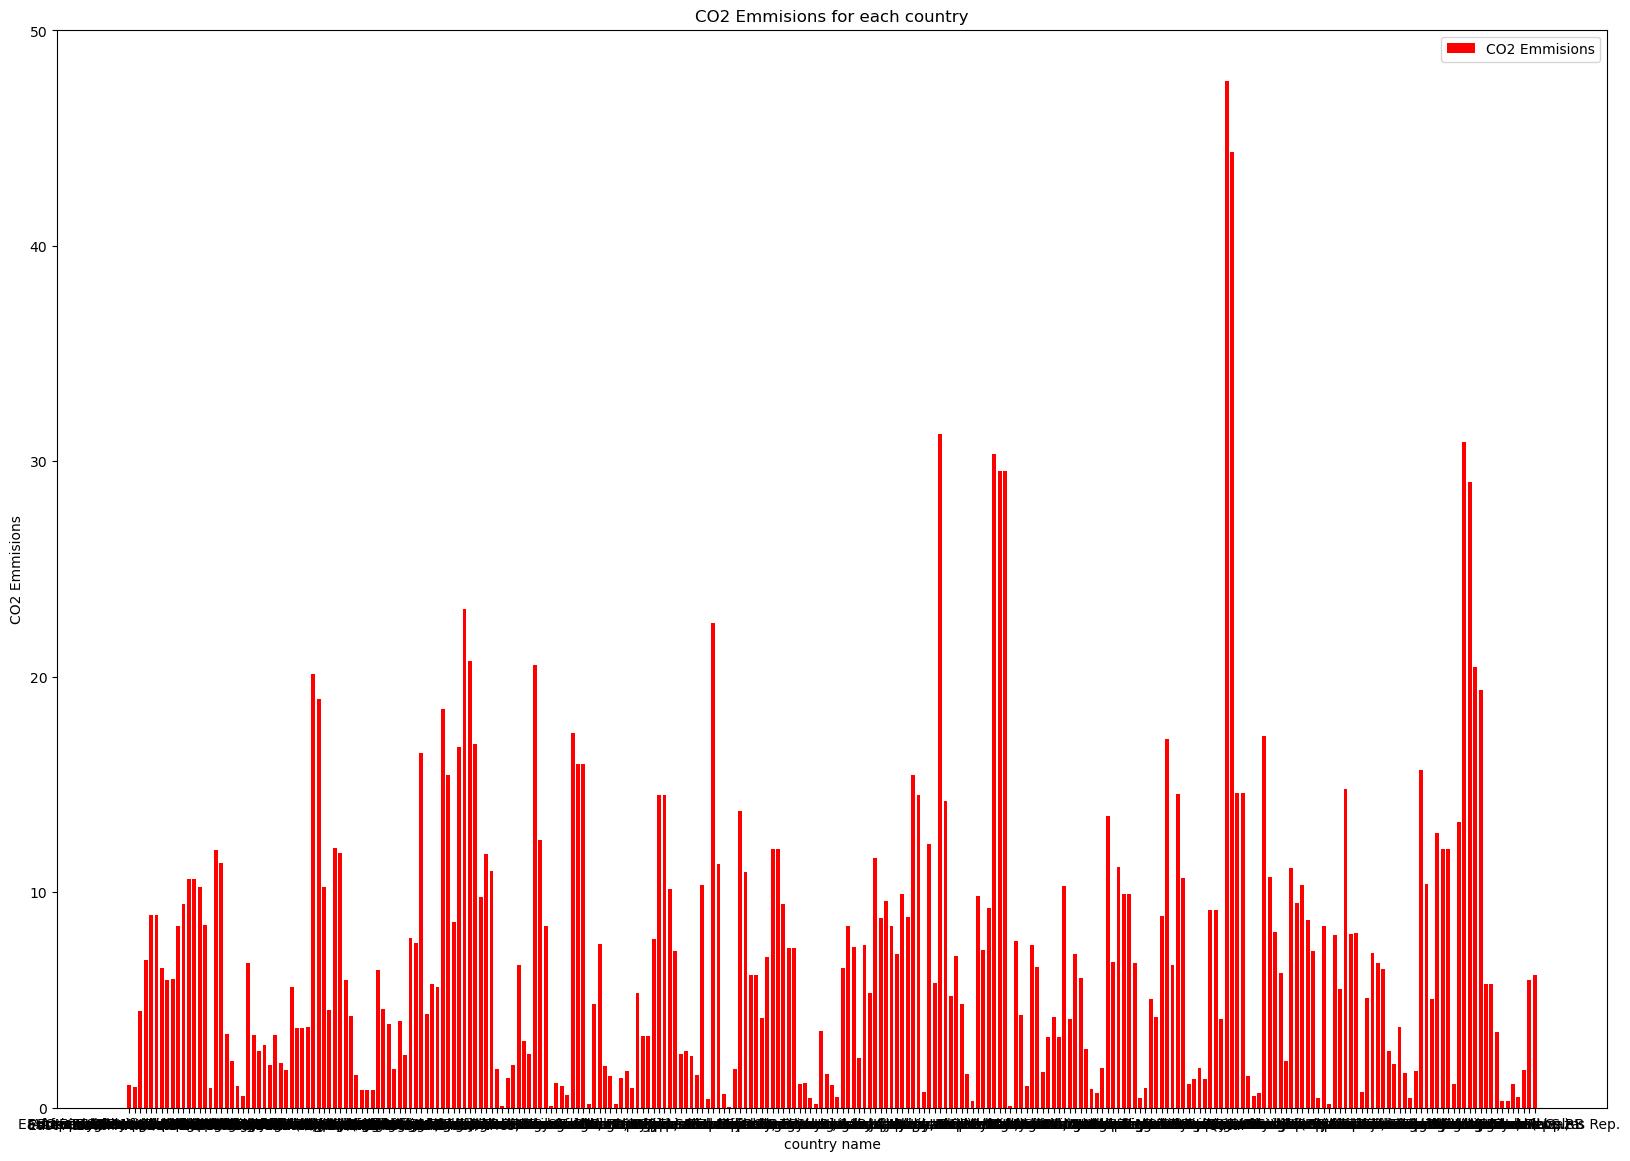

In [33]:
plt.figure(figsize =(20, 14))
plt.bar(wrldbnk['country'], wrldbnk['CO2Emmisions'], color = 'r', width = 0.72, label = "CO2 Emmisions")
plt.xlabel('country name')
plt.ylabel('CO2 Emmisions')
plt.title('CO2 Emmisions for each country')
plt.legend()
plt.show()

In [34]:
X = wrldbnk[['CO2Emmisions','year']]
y = wrldbnk['gdp']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 121)

In [36]:
kmeans = KMeans(n_clusters=5, random_state=0) 

In [37]:
y_means=kmeans.fit_predict(X_train)

In [38]:
y_means

array([0, 2, 3, ..., 1, 0, 3])

In [39]:
kmeans.cluster_centers_

array([[   3.75366404, 2014.49537595],
       [   3.12928807, 1985.0217597 ],
       [   3.4123103 , 2000.08910891],
       [   3.13087591, 1968.50705089],
       [  24.51167681, 2000.31428571]])

In [40]:
kmeans.inertia_

337170.71885282494

In [41]:
km_score=r2_score(y_train, y_means)

In [42]:
km_score

-0.36464862468608317

In [43]:
xdata =wrldbnk['CO2Emmisions'].values

In [44]:
ydata=wrldbnk['gdp'].values

In [45]:
xdata

array([0.90376411, 0.90376411, 0.90376411, ..., 4.99302539, 5.14567193,
       0.35185942])

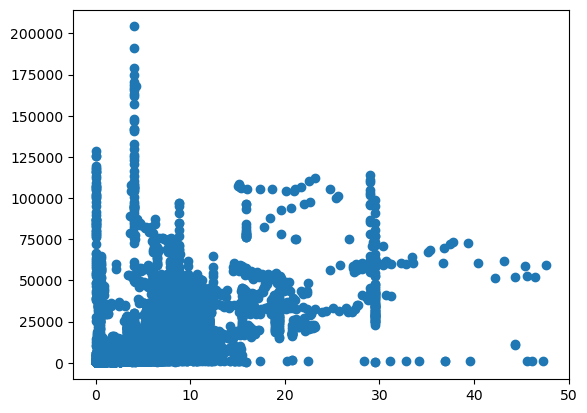

In [46]:
plt.plot(xdata, ydata, 'o')

In [47]:
def Gauss(x, A, B):
    y = A*np.exp(-1*B*x**2)
    return y

In [48]:
parameters, covariance = curve_fit(Gauss, xdata, ydata)

In [49]:
fit_A = parameters[0]
fit_B = parameters[1]
print(fit_A)
print(fit_B)

10294.620481027236
-0.0010679249796522097


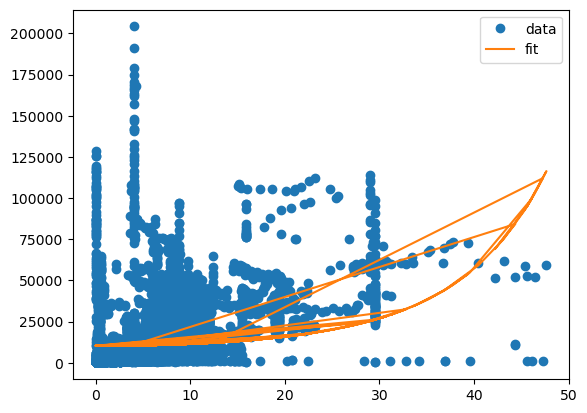

In [50]:
fit_y = Gauss(xdata, fit_A, fit_B)
plt.plot(xdata, ydata, 'o', label='data')
plt.plot(xdata, fit_y, '-', label='fit')
plt.legend()

In [51]:
std_err = np.sqrt(np.diag(covariance))
std_err_A = std_err[0]
std_err_B = std_err[1]

print(F'The value of A is {fit_A:.5f} with standard error of {std_err_A:.5f}.')
print(F'The value of B is {fit_B:.5f} with standard error of {std_err_B:.5f}.')

The value of A is 10294.62048 with standard error of 145.11962.
The value of B is -0.00107 with standard error of 0.00002.


In [53]:
wrldbnk.to_csv('wrldbnk.csv')